Import all needed libareries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statistics as stats
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

Reading csv file

In [6]:
data_loading=pd.read_csv("/content/FIFA World Cup.csv")
data_loading.head(5)
data = data_loading

In [7]:
data.shape

(21, 9)

In [8]:
data.describe()

,Year,Totalattendance,Matches,Averageattendance,highest attendence of Number
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,1976.857143,1.930118e+06,42.857143,42147.238095,83884.809524
std,26.657618,1.077834e+06,17.467930,12191.364566,26571.780711
min,1930.000000,3.630000e+05,17.000000,20872.000000,50928.000000
25%,1958.000000,8.931720e+05,32.000000,32808.000000,69029.000000
50%,1978.000000,1.865753e+06,38.000000,46039.000000,78011.000000
75%,1998.000000,2.785100e+06,64.000000,49099.000000,94194.000000
max,2018.000000,3.587538e+06,64.000000,68991.000000,173850.000000


Creating file into DataFrame

In [9]:
data_frame=pd.DataFrame(data_loading)
data_frame.head()

,Year,Hosts,Venues/Cities,Totalattendance,Matches,Averageattendance,highest attendence of Number,highest attendence of Venue,highest attendence of Game(s)
0,1930,Uruguay,03-Jan,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,08-Aug,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10-Sep,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,06-Jun,1045246,22,47511,173850,"Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,06-Jun,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"


Renaming Index Name

In [10]:
mapping_index_name={data_frame.columns[0]:"Year",data_frame.columns[1]:"Hosts",data_frame.columns[2]:"Venue",data_frame.columns[3]:"TotalAttendance",data_frame.columns[4]:"Matches",data_frame.columns[5]:"AverageAttendance",data_frame.columns[6]:"Hightest Attendance",data_frame.columns[7]:"Highest Attendance Venue",data_frame.columns[8]:"Highest Attendance of Game"}
data_rename=data_frame.rename(columns=mapping_index_name)
data_rename.head()

,Year,Hosts,Venue,TotalAttendance,Matches,AverageAttendance,Hightest Attendance,Highest Attendance Venue,Highest Attendance of Game
0,1930,Uruguay,03-Jan,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,08-Aug,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10-Sep,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,06-Jun,1045246,22,47511,173850,"Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,06-Jun,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"


Dropping String values for making easy for visualising and analying data file

In [11]:
data=data_rename.drop(["Hosts","Venue","Highest Attendance Venue","Highest Attendance of Game"],axis=1)
data.head()

,Year,TotalAttendance,Matches,AverageAttendance,Hightest Attendance
0,1930,590549,18,32808,93000
1,1934,363000,17,21353,55000
2,1938,375700,18,20872,58455
3,1950,1045246,22,47511,173850
4,1954,768607,26,29562,63000


Checking Whether data has null values

In [12]:
data.isnull().sum()

Year                   0
TotalAttendance        0
Matches                0
AverageAttendance      0
Hightest Attendance    0
dtype: int64

In [13]:
data.duplicated().sum()

0

Mean , Median , Mode , Correlation , Covariance

In [14]:
mean=data["TotalAttendance"].mean()
mean

1930118.0

In [15]:
median=data["TotalAttendance"].median()
median

1865753.0

In [16]:
mode=data["TotalAttendance"].mode()
mode

0      363000
1      375700
2      590549
3      768607
4      819810
5      893172
6     1045246
7     1545791
8     1563135
9     1603975
10    1865753
11    2109723
12    2394031
13    2516215
14    2705197
15    2785100
16    3031768
17    3178856
18    3359439
19    3429873
20    3587538
Name: TotalAttendance, dtype: int64

In [17]:
data.corr()

,Year,TotalAttendance,Matches,AverageAttendance,Hightest Attendance
Year,1.000000,0.949919,0.972029,0.693429,-0.041870
TotalAttendance,0.949919,1.000000,0.936561,0.824497,0.066223
Matches,0.972029,0.936561,1.000000,0.610452,-0.092619
AverageAttendance,0.693429,0.824497,0.610452,1.000000,0.462858
Hightest Attendance,-0.041870,0.066223,-0.092619,0.462858,1.000000


In [18]:
data.cov()

,Year,TotalAttendance,Matches,AverageAttendance,Hightest Attendance
Year,7.106286e+02,2.729353e+07,4.526286e+02,2.253593e+05,-2.965843e+04
TotalAttendance,2.729353e+07,1.161727e+12,1.763314e+07,1.083411e+10,1.896626e+09
Matches,4.526286e+02,1.763314e+07,3.051286e+02,1.300005e+05,-4.298933e+04
AverageAttendance,2.253593e+05,1.083411e+10,1.300005e+05,1.486294e+08,1.499413e+08
Hightest Attendance,-2.965843e+04,1.896626e+09,-4.298933e+04,1.499413e+08,7.060595e+08


Visualising with all possibles plot with help of seaborn libraries

<Axes: >

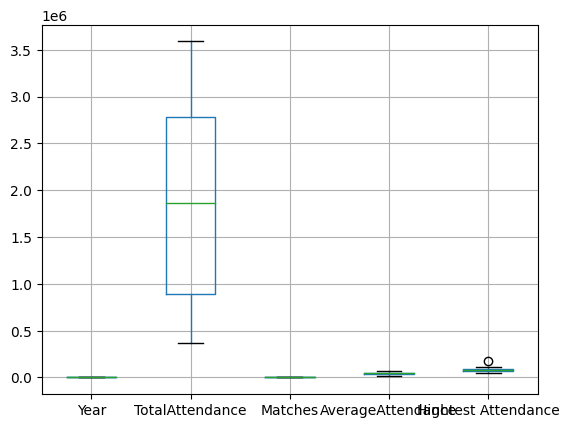

In [19]:
data.boxplot()

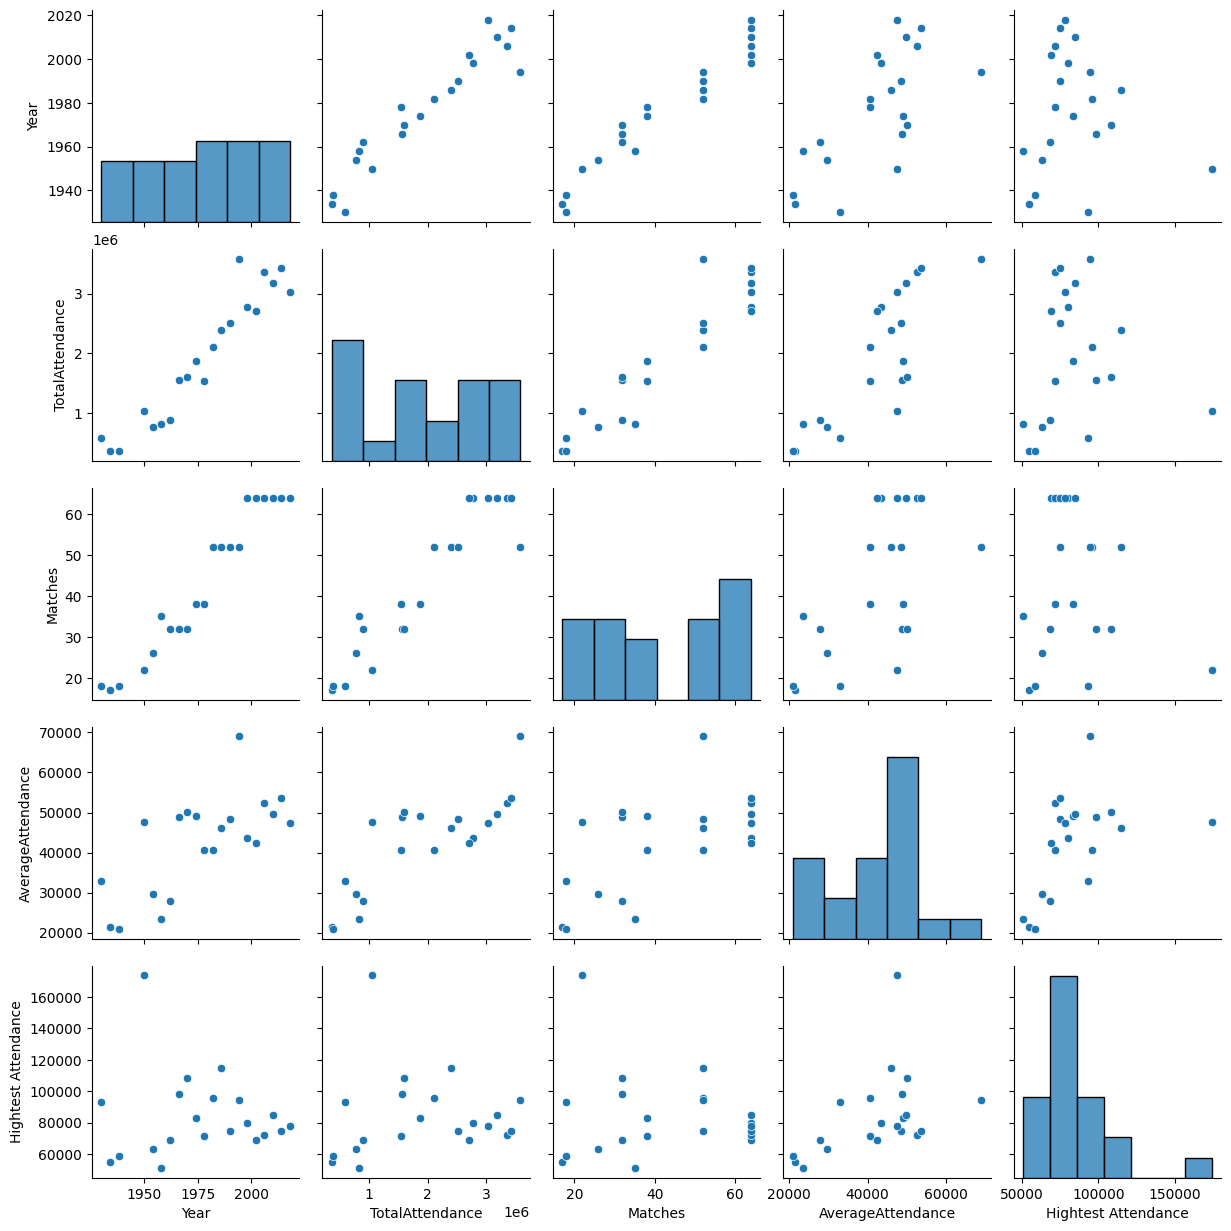

In [20]:
sns.pairplot(data)

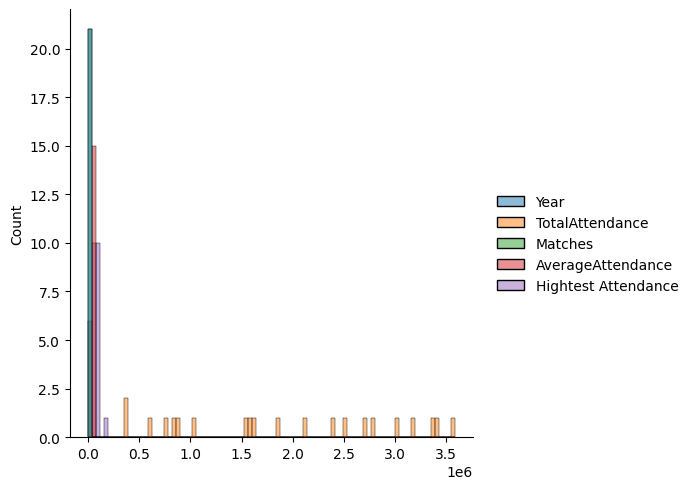

In [21]:
sns.displot(data)

<Axes: xlabel='TotalAttendance', ylabel='Density'>

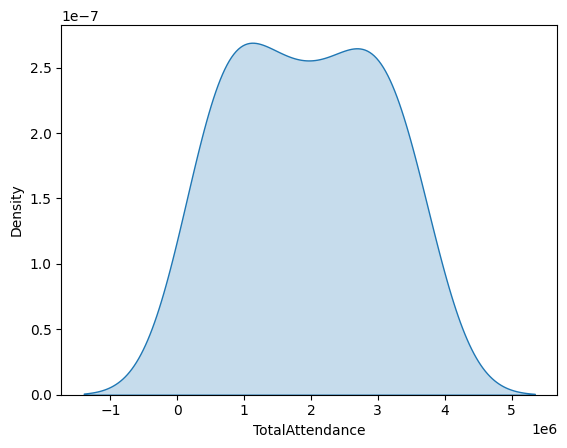

In [22]:
sns.kdeplot(data["TotalAttendance"],shade=True)

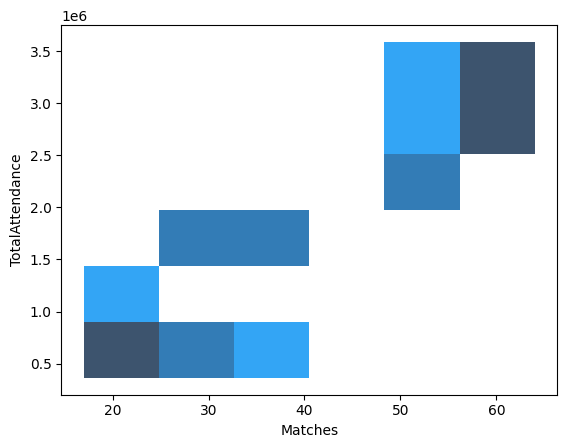

In [71]:
sns.histplot(x = "Matches",y = "TotalAttendance",data=data)
plt.show()

<Axes: >

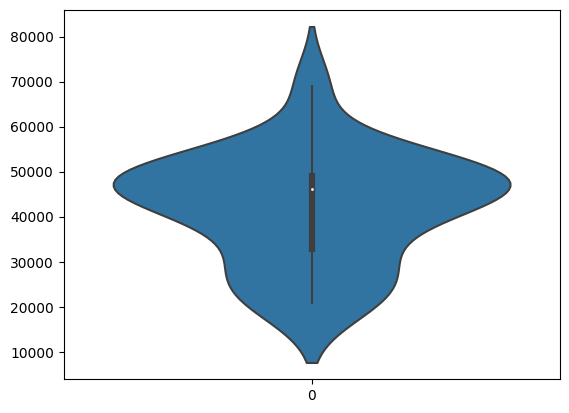

In [34]:
sns.violinplot(data["AverageAttendance"])

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'TotalAttendance'}>],
       [<Axes: title={'center': 'Matches'}>,
        <Axes: title={'center': 'AverageAttendance'}>],
       [<Axes: title={'center': 'Hightest Attendance'}>, <Axes: >]],
      dtype=object)

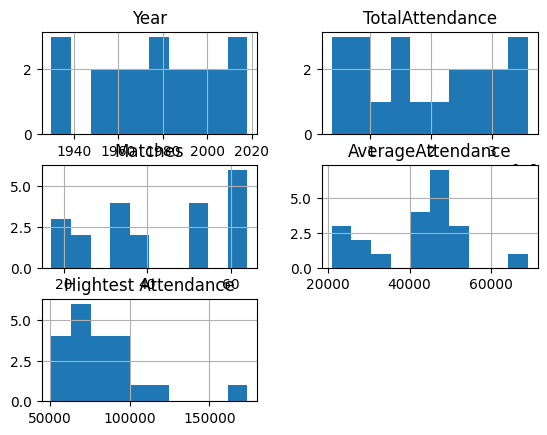

In [35]:
data.hist()

<Axes: xlabel='Year', ylabel='TotalAttendance'>

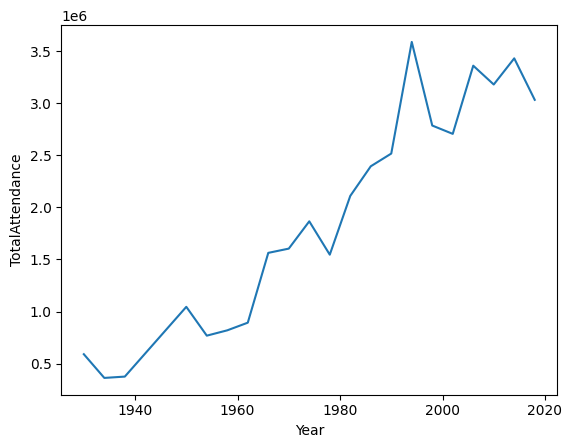

In [53]:
sns.lineplot(x = data["Year"],y = data["TotalAttendance"])

<Axes: xlabel='Year', ylabel='Matches'>

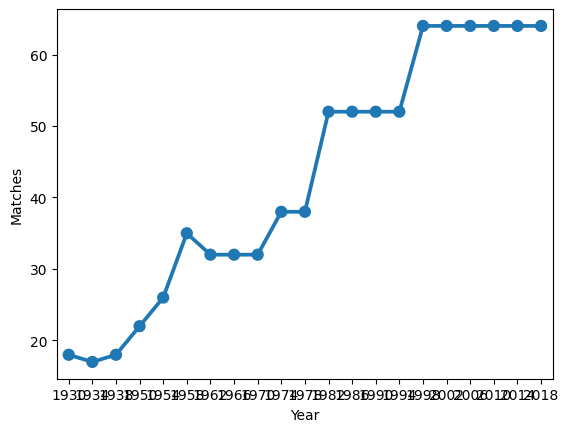

In [45]:
sns.pointplot(x="Year",y="Matches",data=data)

<Axes: xlabel='Matches', ylabel='count'>

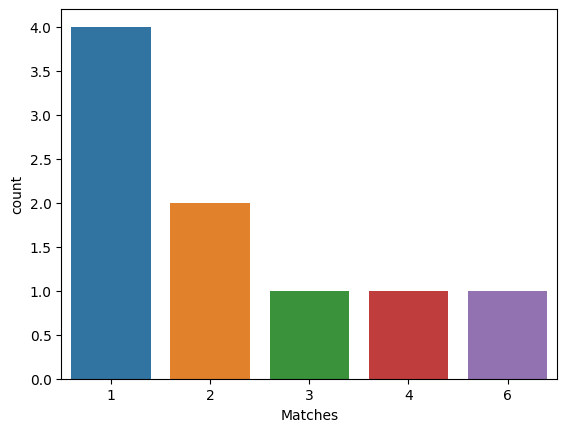

In [55]:
sns.countplot(x = data["Matches"].value_counts())

<Axes: >

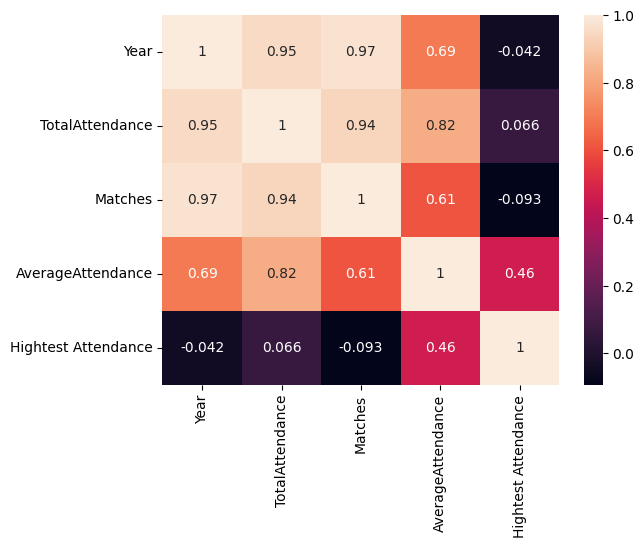

In [57]:
sns.heatmap(data = data.corr(),annot = True,cbar=True)

Machine Learning Algorithms ( Prediction )

m7683122.779047619,b3860.236,iteration0
m-60045785689.42507,b-30369159.538889408,iteration1
m469334915895567.2,b237373576116.2345,iteration2
m-3.668454948887088e+18,b-1855379262927992.5,iteration3
m2.8673685371059907e+22,b1.4502171069409751e+19,iteration4
m-2.241216654460926e+26,b-1.13353086308909e+23,iteration5
m1.7517985662571116e+30,b8.859999040321579e+26,iteration6
m-1.3692554937213787e+34,b-6.925226789200322e+30,iteration7
m1.0702489676607048e+38,b5.412953868685419e+34,iteration8
m-8.365369779643777e+41,b-4.2309184199150006e+38,iteration9


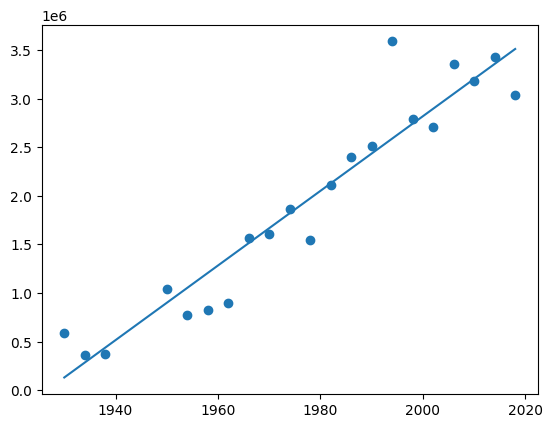

In [58]:
x=data.iloc[:,0]
y=data.iloc[:,1]
def gradient_descent(x,y):
  m_curr = b_curr = 0
  n=len(x)
  iterations =10
  learning_rate=0.001
  for i in range(iterations):
    y_predicted=m_curr*x+b_curr
    md=-(2/n)*sum(x*(y-y_predicted))
    bd=-(2/n)*sum(y-y_predicted)
    m_curr=m_curr-learning_rate*md
    b_curr=b_curr-learning_rate*bd
    print("m{},b{},iteration{}".format(m_curr,b_curr,i))
gradient_descent(x,y)
reg=np.polyfit(x,y,deg=1)
best_fit_line=np.polyval(reg,x)
plt.scatter(x,y)
plt.plot(x,best_fit_line)

Text(58.222222222222214, 0.5, 'Truth')

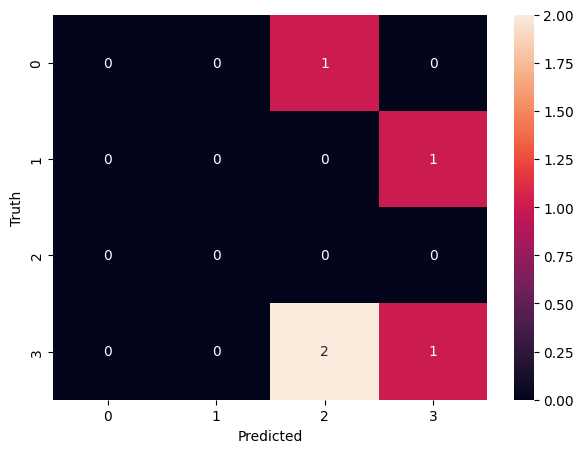

In [59]:
from sklearn.model_selection import train_test_split
x = data.drop(['Matches','TotalAttendance'], axis='columns')
y = data.Matches
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          22       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         0
          64       0.50      0.33      0.40         3

    accuracy                           0.20         5
   macro avg       0.12      0.08      0.10         5
weighted avg       0.30      0.20      0.24         5



In [73]:
y_pred    # predicted next 5 years  in context of Thousand

array([64, 64, 52, 52, 52])

Predicting attendance of 2022 in csv file


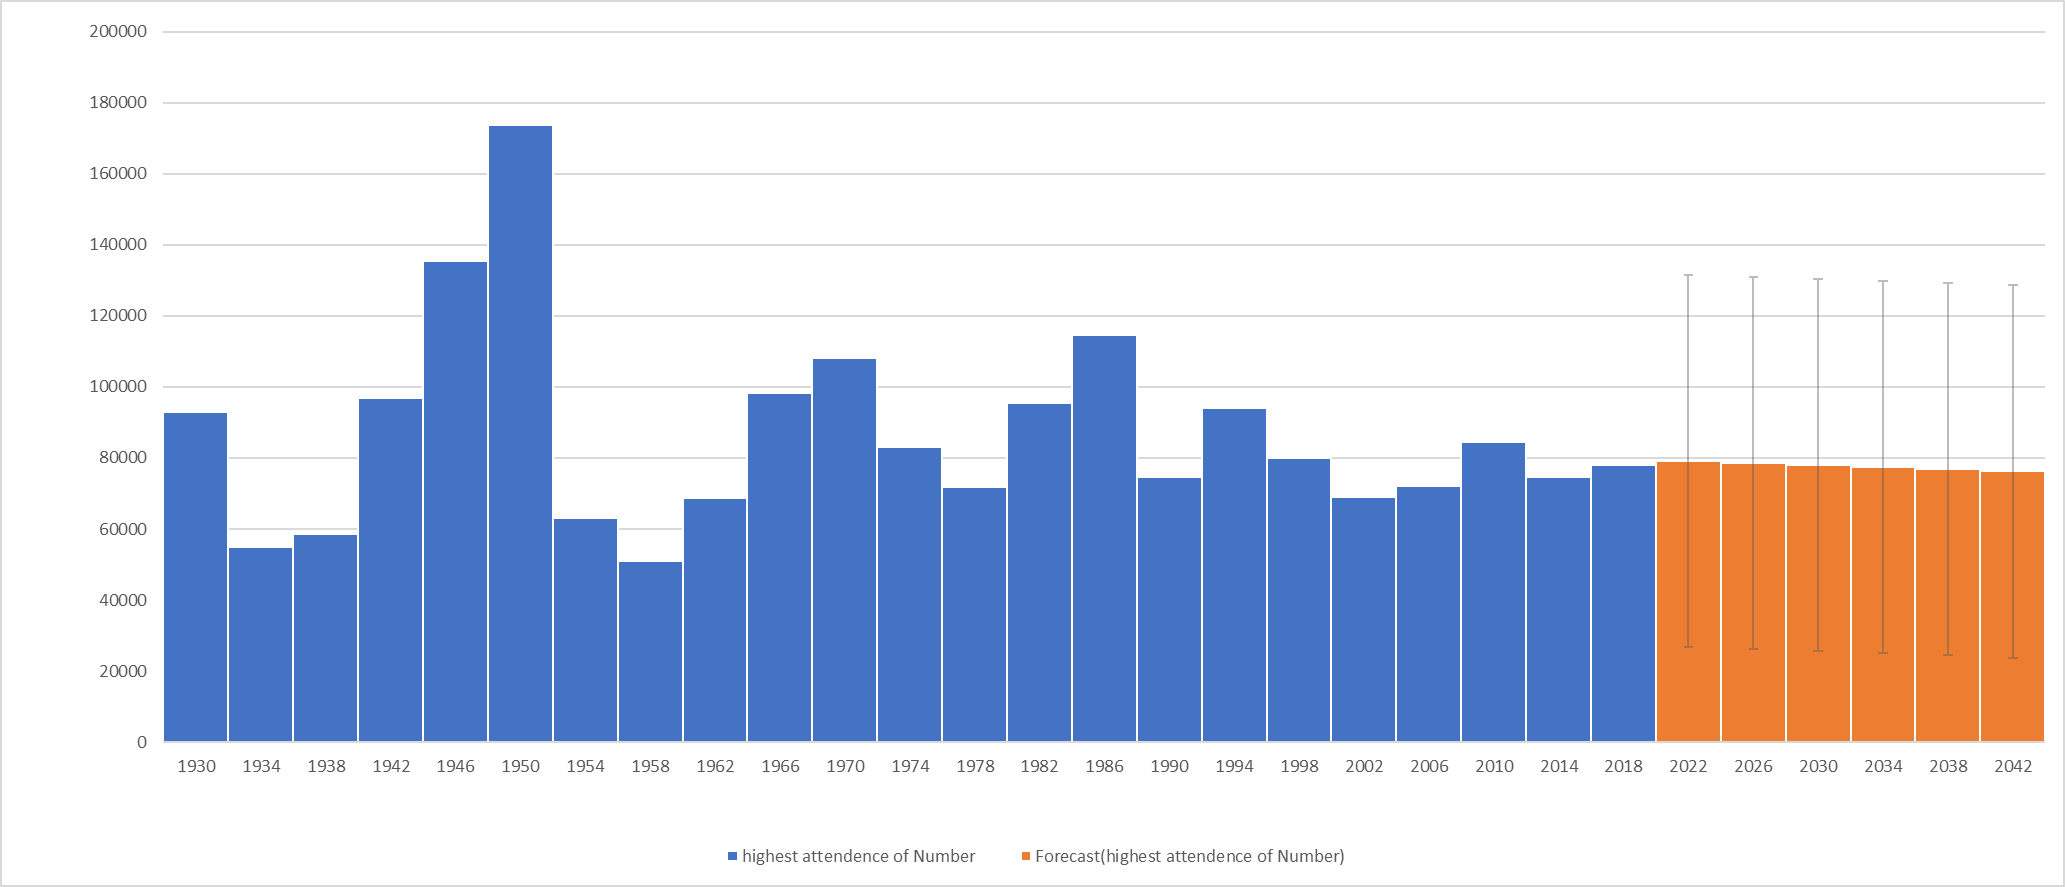
